## Data set import

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler



df = pd.read_csv('drive/MyDrive/Colab Notebooks/archive/genre/features.csv')
X = df.drop('Genre',axis="columns")
y = df['Genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

In [ ]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 1.36695404  1.85496862  0.76829029  1.00890313  0.51686136 -0.30440468
   0.13824398 -1.12271089 -0.69132329  2.19795146 -0.62416293  0.77878117
   0.34333536  0.48115709  0.64956354 -1.75496903]]
[0.07292029]


In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
metrics.accuracy_score(y_test, y_predict)


0.975

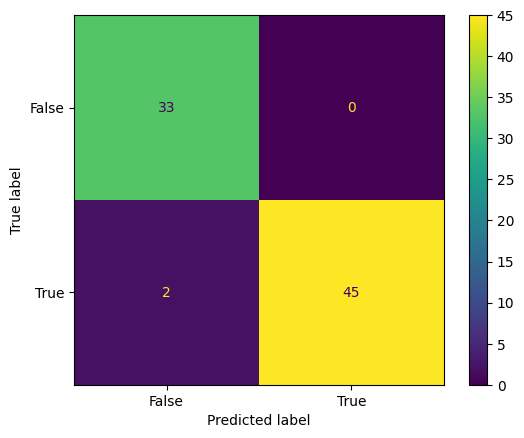

In [ ]:
import matplotlib.pyplot as plt

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## KNN

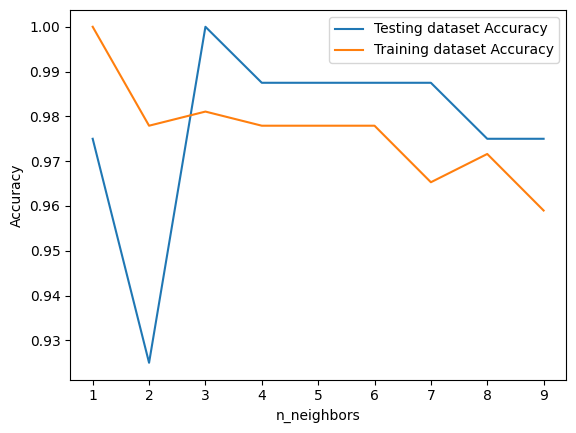

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(knn.score(X_test, y_test))

1.0


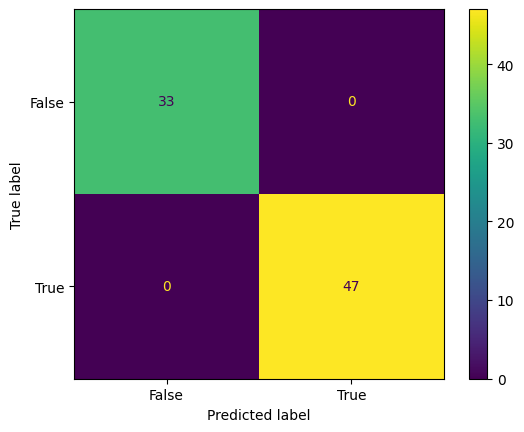

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
metrics.accuracy_score(y_test, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()